In [ ]:
!pip install timm

In [1]:
import torch
import timm
import scipy

from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10,CIFAR100,Food101
from torchvision.transforms import Compose, ToTensor, Normalize
import os
import random
from itertools import permutations

import torch
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

In [2]:
# Define our own plot function
def scatter(x, labels, root='plot', subtitle=None, idx2name=None):
    
    num_classes = len(idx2name) # Calculate the number of classes
    palette = np.array(sns.color_palette("hls", num_classes)) # Choosing color

    ## Create a seaborn scatter plot ##
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int32)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    ## ---------------------------- ##
    
        
    txts = []
    for i in range(num_classes):
        # Position of each label.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, idx2name[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)        
        
    ## ---------------------------- ##    
        
    if subtitle != None:
        plt.suptitle(subtitle)
        
    if not os.path.exists(root):
        os.makedirs(root)        
    plt.savefig(os.path.join(root, str(subtitle)))

In [3]:
tsne = TSNE(random_state=0)

In [4]:
train_loader = DataLoader(CIFAR100('./CIFAR100/', train=True, download=True,
                                transform=Compose([ToTensor(),Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                               ),batch_size=128, shuffle=True,num_workers=0)
test_loader = DataLoader(CIFAR100('./CIFAR100/', train=False, download=True,
                                transform=Compose([ToTensor(),Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                               ),batch_size=128, shuffle=False,num_workers=0,)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
x_test, y_test = next(iter(test_loader))
x_test = x_test.flatten(1).detach().numpy()
y_test = y_test.detach().numpy()

In [6]:
x_train, y_train = next(iter(train_loader))
x_train = x_train.flatten(1).detach().numpy()
y_train = y_train.detach().numpy()

In [7]:
train_tsne_embeds = tsne.fit_transform(x_train)
test_tsne_embeds = tsne.fit_transform(x_test)

/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [8]:
idx2name=train_loader.dataset.classes

/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx a

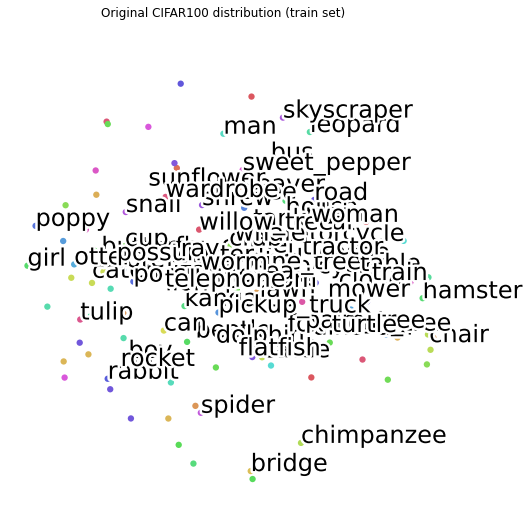

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

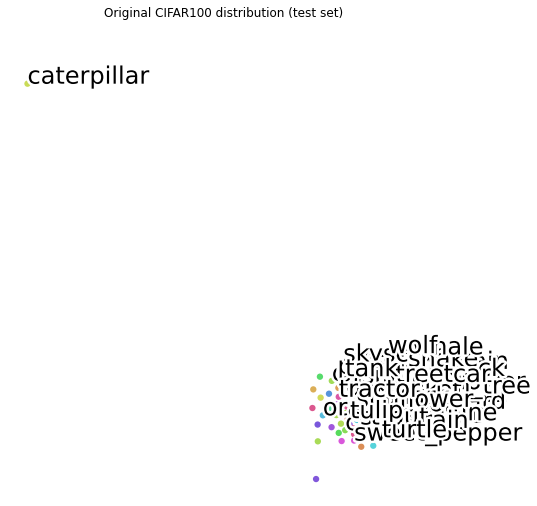

In [9]:
scatter(train_tsne_embeds, y_train, subtitle=f'Original CIFAR100 distribution (train set)', idx2name=idx2name)
scatter(test_tsne_embeds, y_test, subtitle=f'Original CIFAR100 distribution (test set)', idx2name=idx2name)

In [10]:

device = torch.device("cuda")

batch_size_train = 128
batch_size_vis = 128
num_workers = 5

In [18]:
import torchvision
import torchvision.transforms as transforms


CIFAR100_TRAIN_MEAN = (0.5070751592371323, 0.48654887331495095, 0.4409178433670343)
CIFAR100_TRAIN_STD = (0.2673342858792401, 0.2564384629170883, 0.27615047132568404)

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(CIFAR100_TRAIN_MEAN, CIFAR100_TRAIN_STD),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(CIFAR100_TRAIN_MEAN, CIFAR100_TRAIN_STD),
])

train_loader = DataLoader(CIFAR100('./CIFAR100/', train=True, download=True,
                                transform=transform_train
                               ),batch_size=batch_size_train, shuffle=True,num_workers=num_workers,)
test_loader = DataLoader(CIFAR100('./CIFAR100/', train=False, download=True,
                                transform=transform_test
                               ),batch_size=batch_size_train, shuffle=False,num_workers=num_workers)

Files already downloaded and verified
Files already downloaded and verified


In [11]:
import torch
import torch.nn as nn

class CenterLoss(nn.Module):
    """Center loss.
    
    Reference:
    Wen et al. A Discriminative Feature Learning Approach for Deep Face Recognition. ECCV 2016.
    
    Args:
        num_classes (int): number of classes.
        feat_dim (int): feature dimension.
    """
    def __init__(self, num_classes=10, feat_dim=2, use_gpu=True):
        super(CenterLoss, self).__init__()
        self.num_classes = num_classes
        self.feat_dim = feat_dim
        self.use_gpu = use_gpu
        if torch.backends.mps.is_available():
            self.device = torch.device("mps")
        elif torch.cuda.is_available():
            self.device = torch.device("cuda")
            
        if self.use_gpu:

            self.centers = nn.Parameter(torch.randn(self.num_classes, self.feat_dim).to(self.device))
        else:
            self.device = torch.device("cpu")
            self.centers = nn.Parameter(torch.randn(self.num_classes, self.feat_dim))

    def forward(self, x, labels):
        """
        Args:
            x: feature matrix with shape (batch_size, feat_dim).
            labels: ground truth labels with shape (batch_size).
        """
        batch_size = x.size(0)
        distmat = torch.pow(x, 2).sum(dim=1, keepdim=True).expand(batch_size, self.num_classes) + \
                  torch.pow(self.centers, 2).sum(dim=1, keepdim=True).expand(self.num_classes, batch_size).t()
        distmat.addmm_(1, -2, x, self.centers.t())

        classes = torch.arange(self.num_classes).long()
        if self.use_gpu: classes = classes.to(self.device)
        labels = labels.unsqueeze(1).expand(batch_size, self.num_classes)
        mask = labels.eq(classes.expand(batch_size, self.num_classes))

        dist = distmat * mask.float()
        loss = dist.clamp(min=1e-12, max=1e+12).sum() / batch_size

        return loss

In [12]:
from torch.optim.lr_scheduler import _LRScheduler
class WarmUpLR(_LRScheduler):
    """warmup_training learning rate scheduler
    Args:
        optimizer: optimzier(e.g. SGD)
        total_iters: totoal_iters of warmup phase
    """
    def __init__(self, optimizer, total_iters, last_epoch=-1):

        self.total_iters = total_iters
        super().__init__(optimizer, last_epoch)

    def get_lr(self):
        """we will use the first m batches, and set the learning
        rate to base_lr * m / total_iters
        """
        return [base_lr * self.last_epoch / (self.total_iters + 1e-8) for base_lr in self.base_lrs]

In [13]:
num_classes = 100
epochs = 200
alpha = 0.5

lr_cent = 0.5
lr = 0.1
warm = 1
MILESTONES = [60, 120, 160]

model = timm.create_model('resnet18',num_classes=0, pretrained=False)
model.conv1 = torch.nn.Conv2d(3,64, kernel_size=(3,3),stride=(1,1),padding=(1,1),bias=False)
model.maxpool = nn.Identity()
classifier = torch.nn.Linear(512,num_classes)

model = model.to(device)
classifier = classifier.to(device)


criterion_xent = nn.CrossEntropyLoss()
criterion_cent = CenterLoss(num_classes=num_classes, feat_dim=512, use_gpu=True)

optimizer_centloss = torch.optim.SGD(criterion_cent.parameters(), lr=lr_cent)
params = list(model.parameters()) + list(classifier.parameters()) 
optimizer = torch.optim.SGD(params, lr=lr, momentum=0.9, weight_decay=5e-4) # here lr is the overall learning rate
iter_per_epoch = len(train_loader)


warmup_scheduler = WarmUpLR(optimizer, iter_per_epoch * warm)

scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=MILESTONES, gamma=0.2) #learning rate decay
   

scheduler_center_loss = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=MILESTONES, gamma=0.2) #learning rate decay
   


In [25]:
for epoch in range(1,epochs+1):  # loop over the dataset multiple times

    running_center_loss_loss = 0.0
    running_cross_loss_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        optimizer_centloss.zero_grad()
        # forward + backward + optimize
        features = model(inputs)
        outputs = classifier(features)
        cross_loss = criterion_xent(outputs, labels)
        center_loss = criterion_cent(features, labels) * alpha 
        loss = cross_loss + center_loss
        
        
        optimizer.zero_grad()
        optimizer_centloss.zero_grad()

        loss.backward()

        # multiple (1./alpha) in order to remove the effect of alpha on updating centers
        for param in criterion_cent.parameters():
            param.grad.data *= (1./alpha)

        optimizer_centloss.step()
        optimizer.step()
        
        if epoch <= warm:
            warmup_scheduler.step()
        
        running_center_loss_loss += center_loss.item()
        running_cross_loss_loss += cross_loss.item()
        

    scheduler.step()
    scheduler_center_loss.step()
    
    train_epoch_loss_center = running_center_loss_loss / len(train_loader)
    train_epoch_loss_cls = running_cross_loss_loss / len(train_loader)

    running_center_loss_loss = 0.0
    running_cross_loss_loss = 0.0
    model.eval()
    for i, data in enumerate(test_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        features = model(inputs)
        outputs = classifier(features)


        cross_loss = criterion_xent(outputs, labels)
        center_loss = criterion_cent(features, labels) * alpha 
        loss = cross_loss + center_loss

        running_center_loss_loss += center_loss.item()
        running_cross_loss_loss += cross_loss.item()
    eval_cls_loss = running_cross_loss_loss / len(test_loader)
    eval_central_loss = running_center_loss_loss / len(test_loader)
    
    
    print(f"At epoches = {epoch}, ")
    print(f"train_epoch_loss_cls = {train_epoch_loss_cls:.6f}, train_epoch_loss_center = {train_epoch_loss_center:.6f}")
    print(f"eval_cls_loss = {eval_cls_loss:.6f}, eval_central_loss = {eval_central_loss:.6f}")

print('Finished Training')

/tmp/ipykernel_12179/489094260.py:40: UserWarning: This overload of addmm_ is deprecated:
	addmm_(Number beta, Number alpha, Tensor mat1, Tensor mat2)
Consider using one of the following signatures instead:
	addmm_(Tensor mat1, Tensor mat2, *, Number beta, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1420.)
  distmat.addmm_(1, -2, x, self.centers.t())


At epoches = 1, 
train_epoch_loss_cls = 4.568373, train_epoch_loss_center = 34.356743
eval_cls_loss = 4.474673, eval_central_loss = 0.179130
At epoches = 2, 
train_epoch_loss_cls = 4.357887, train_epoch_loss_center = 0.113474
eval_cls_loss = 4.280564, eval_central_loss = 0.164924
At epoches = 3, 
train_epoch_loss_cls = 4.137342, train_epoch_loss_center = 0.147420
eval_cls_loss = 3.996322, eval_central_loss = 0.242863
At epoches = 4, 
train_epoch_loss_cls = 3.962510, train_epoch_loss_center = 0.180430
eval_cls_loss = 3.832297, eval_central_loss = 0.232968
At epoches = 5, 
train_epoch_loss_cls = 3.787120, train_epoch_loss_center = 0.210041
eval_cls_loss = 3.648873, eval_central_loss = 0.268950
At epoches = 6, 
train_epoch_loss_cls = 3.619740, train_epoch_loss_center = 0.229738
eval_cls_loss = 3.550206, eval_central_loss = 0.364964
At epoches = 7, 
train_epoch_loss_cls = 3.431903, train_epoch_loss_center = 0.258602
eval_cls_loss = 3.294063, eval_central_loss = 0.275308
At epoches = 8, 
tr

At epoches = 60, 
train_epoch_loss_cls = 1.528486, train_epoch_loss_center = 0.428684
eval_cls_loss = 1.682173, eval_central_loss = 0.538291
At epoches = 61, 
train_epoch_loss_cls = 1.167147, train_epoch_loss_center = 0.348141
eval_cls_loss = 1.171909, eval_central_loss = 0.405362
At epoches = 62, 
train_epoch_loss_cls = 1.007278, train_epoch_loss_center = 0.333517
eval_cls_loss = 1.117928, eval_central_loss = 0.402767
At epoches = 63, 
train_epoch_loss_cls = 0.944219, train_epoch_loss_center = 0.327620
eval_cls_loss = 1.092525, eval_central_loss = 0.404632
At epoches = 64, 
train_epoch_loss_cls = 0.899430, train_epoch_loss_center = 0.321037
eval_cls_loss = 1.072116, eval_central_loss = 0.401218
At epoches = 65, 
train_epoch_loss_cls = 0.865147, train_epoch_loss_center = 0.316088
eval_cls_loss = 1.053656, eval_central_loss = 0.410855
At epoches = 66, 
train_epoch_loss_cls = 0.834800, train_epoch_loss_center = 0.310924
eval_cls_loss = 1.036877, eval_central_loss = 0.413268
At epoches = 

At epoches = 118, 
train_epoch_loss_cls = 0.234468, train_epoch_loss_center = 0.195876
eval_cls_loss = 1.037835, eval_central_loss = 0.713739
At epoches = 119, 
train_epoch_loss_cls = 0.232419, train_epoch_loss_center = 0.197726
eval_cls_loss = 1.077828, eval_central_loss = 0.750483
At epoches = 120, 
train_epoch_loss_cls = 0.235302, train_epoch_loss_center = 0.199703
eval_cls_loss = 1.052200, eval_central_loss = 0.718405
At epoches = 121, 
train_epoch_loss_cls = 0.193261, train_epoch_loss_center = 0.167182
eval_cls_loss = 0.997423, eval_central_loss = 0.722201
At epoches = 122, 
train_epoch_loss_cls = 0.171652, train_epoch_loss_center = 0.154310
eval_cls_loss = 0.994516, eval_central_loss = 0.725832
At epoches = 123, 
train_epoch_loss_cls = 0.162392, train_epoch_loss_center = 0.149489
eval_cls_loss = 0.988382, eval_central_loss = 0.731419
At epoches = 124, 
train_epoch_loss_cls = 0.154506, train_epoch_loss_center = 0.146310
eval_cls_loss = 0.991453, eval_central_loss = 0.737982
At epo

At epoches = 176, 
train_epoch_loss_cls = 0.106322, train_epoch_loss_center = 0.121330
eval_cls_loss = 0.997620, eval_central_loss = 0.814310
At epoches = 177, 
train_epoch_loss_cls = 0.105935, train_epoch_loss_center = 0.119832
eval_cls_loss = 0.998037, eval_central_loss = 0.818647
At epoches = 178, 
train_epoch_loss_cls = 0.105085, train_epoch_loss_center = 0.119788
eval_cls_loss = 1.002105, eval_central_loss = 0.824214
At epoches = 179, 
train_epoch_loss_cls = 0.108644, train_epoch_loss_center = 0.123270
eval_cls_loss = 1.001620, eval_central_loss = 0.814251
At epoches = 180, 
train_epoch_loss_cls = 0.107086, train_epoch_loss_center = 0.122751
eval_cls_loss = 1.002349, eval_central_loss = 0.813078
At epoches = 181, 
train_epoch_loss_cls = 0.106919, train_epoch_loss_center = 0.121767
eval_cls_loss = 0.998524, eval_central_loss = 0.817957
At epoches = 182, 
train_epoch_loss_cls = 0.105103, train_epoch_loss_center = 0.120769
eval_cls_loss = 1.003464, eval_central_loss = 0.811847
At epo

In [26]:
torch.save(model.state_dict(),'./model_100_200epochs.torch')
torch.save(classifier.state_dict(),'./classifier_100_200epochs.torch')

In [14]:
model.load_state_dict(torch.load('./model_100_200epochs.torch'))
classifier.load_state_dict(torch.load('./classifier_100_200epochs.torch'))

<All keys matched successfully>

/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/theator/.pyenv/versions/3.8.12/envs/research38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: R

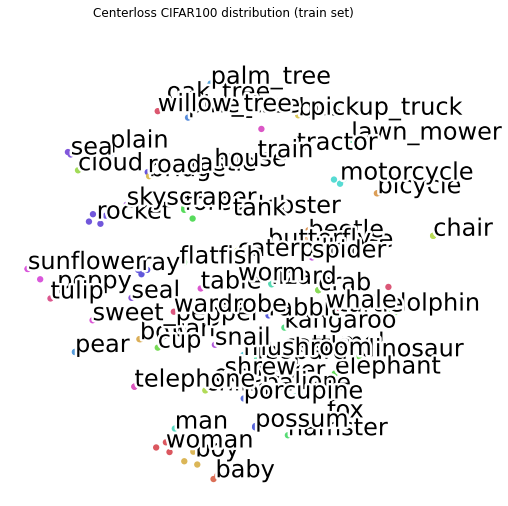

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

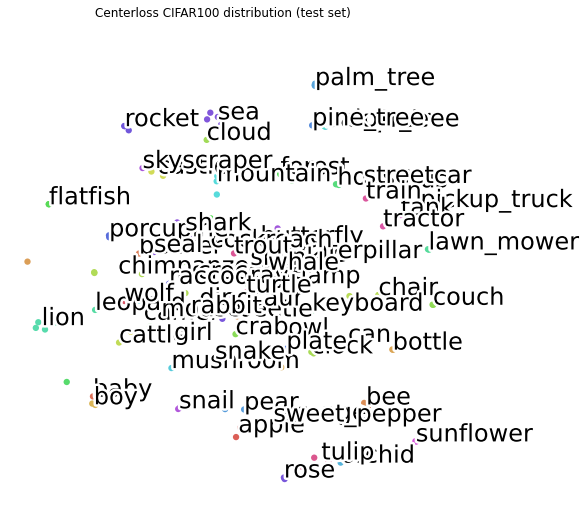

In [15]:
train_outputs = model(torch.tensor(x_train).reshape(128,3,32,32).to(device))
test_outputs = model(torch.tensor(x_test).reshape(128,3,32,32).to(device))
train_tsne_embeds = tsne.fit_transform(train_outputs.cpu().detach().numpy())
test_tsne_embeds = tsne.fit_transform(test_outputs.cpu().detach().numpy())

scatter(train_tsne_embeds, y_train, subtitle=f'Centerloss CIFAR100 distribution (train set)', idx2name=idx2name)
scatter(test_tsne_embeds, y_test, subtitle=f'Centerloss CIFAR100 distribution (test set)', idx2name=idx2name)

In [16]:
def fe(loader, model):
    model.eval()
    features_list = []
    labels_list = []
    for idx, (images, labels) in enumerate(loader):

        images = images.to(device, non_blocking=True)

        with torch.no_grad():
            features = model(images)

        features_list.append(features.cpu())
        labels_list.append(labels.cpu())
  

    return torch.cat(features_list), torch.cat(labels_list)

In [19]:
train_loader_for_fe = DataLoader(CIFAR100('./CIFAR100/', train=True, download=True,
                                transform=transform_test
                               ),batch_size=batch_size_train, shuffle=True,num_workers=num_workers,)
test_loader_for_fe = DataLoader(CIFAR100('./CIFAR100/', train=False, download=True,
                                transform=transform_test
                               ),batch_size=batch_size_train, shuffle=False,num_workers=num_workers)

train_features, train_labels = fe(train_loader_for_fe,model)
valid_features, valid_labels = fe(test_loader_for_fe,model)

Files already downloaded and verified
Files already downloaded and verified


In [24]:
from sklearn.neighbors import KNeighborsClassifier

for n in [2,5,10,20,30,40,50,60,70,80,90,100,150,300]:
    neigh_full = KNeighborsClassifier(n_neighbors=n)

    neigh_full.fit(train_features.numpy(), train_labels.numpy())
    knn_512_res = neigh_full.predict_proba(valid_features.numpy())
    knn_512 = (knn_512_res.argmax(1) == valid_labels.numpy()).sum() / len(valid_labels)
    print(knn_512,n)


0.7387 2
0.7426 5
0.7437 10
0.7451 20
0.7453 30
0.7454 40
0.7459 50
0.7461 60
0.7459 70
0.746 80
0.7462 90
0.7463 100
0.7467 150
0.7474 300


In [34]:
n_neighbors = 50

neigh_full = KNeighborsClassifier(n_neighbors=40)

neigh_full.fit(train_features.numpy(), train_labels.numpy())
knn_512_res = neigh_full.predict_proba(valid_features.numpy())

In [35]:
trs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
knn_full_res = []
res_tr_dict_full = dict()
num_of_passed_dict_full = dict()
for tr in trs:
        idxs = knn_512_res.max(1)> tr
        num_of_passed_dict_full[tr] = (idxs.sum() / len(valid_labels))
        res_tr_dict_full[tr] = ((knn_512_res[idxs].argmax(1) == valid_labels.numpy()[idxs]).sum() / len(valid_labels.numpy()[idxs]))


In [36]:
classifier.eval()
with torch.no_grad():
    classifier_results_valid = classifier(valid_features.to(device))

In [37]:
fc_results = (classifier_results_valid.softmax(dim=1).max(dim=1)[1].cpu() == valid_labels).sum() / len(valid_labels)

In [38]:
from sklearn.random_projection import SparseRandomProjection
rng = np.random.RandomState(42)
trs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
res = []
res_tr_dict = {}
num_of_passed_dict = {}
for comp in [256,128,64,32,16,4,2]:
    sp = SparseRandomProjection(n_components = comp,random_state=rng)
    X = sp.fit_transform(train_features.numpy())

    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    neigh.fit(X, train_labels.numpy())
    TEST = sp.transform(valid_features.numpy())
    valid_res = neigh.predict_proba(TEST)
    res.append((valid_res.argmax(1) == valid_labels.numpy()).sum() / len(valid_labels))
    res_tr_dict[comp] = dict()
    num_of_passed_dict[comp] = dict()
    for tr in trs:
        idxs = valid_res.max(1)> tr
        num_of_passed_dict[comp][tr] = (idxs.sum() / len(valid_labels))
        res_tr_dict[comp][tr] = ((valid_res[idxs].argmax(1) == valid_labels.numpy()[idxs]).sum() / len(valid_labels.numpy()[idxs]))


In [39]:
s_c = classifier_results_valid.softmax(dim=1)
cls_results = dict()
cls_per = dict()
for tr in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]:
    idxs = s_c.max(dim=1)[0] > tr
    cls_results[tr] = (s_c[idxs].max(dim=1)[1].cpu() == valid_labels[idxs.cpu()]).sum() / len(valid_labels[idxs.cpu()])
    cls_per[tr] = (sum(idxs) / len(valid_labels)).item()

In [40]:
from sklearn.decomposition import PCA
rng = np.random.RandomState(42)
trs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
res_pca = []
res_tr_dict_pca = {}
num_of_passed_dict_pca = {}
for comp in [256,128,64,32,16,4,2]:
    sp = PCA(n_components = comp,random_state=rng)
    X = sp.fit_transform(train_features.numpy())

    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    neigh.fit(X, train_labels.numpy())
    TEST = sp.transform(valid_features.numpy())
    valid_res = neigh.predict_proba(TEST)
    res_pca.append((valid_res.argmax(1) == valid_labels.numpy()).sum() / len(valid_labels))
    res_tr_dict_pca[comp] = dict()
    num_of_passed_dict_pca[comp] = dict()
    for tr in trs:
        idxs = valid_res.max(1)> tr
        num_of_passed_dict_pca[comp][tr] = (idxs.sum() / len(valid_labels))
        res_tr_dict_pca[comp][tr] = ((valid_res[idxs].argmax(1) == valid_labels.numpy()[idxs]).sum() / len(valid_labels.numpy()[idxs]))


In [26]:
from torch import nn
from torch import optim
import math

In [27]:
class Autoencoder(nn.Module):
    def __init__(self, in_shape, enc_shape):
        super(Autoencoder, self).__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(in_shape, 256),
        )
        depth = [2**i for i in range(int(math.log2(128)),int(math.log2(enc_shape))-1,-1)]
        last = 256
        for d in depth:
            self.encode.extend([
                nn.ReLU(True),
                nn.Dropout(0.2),
                nn.Linear(last, d)
            ])
            last = d
        
        self.decode = nn.Sequential(
            nn.BatchNorm1d(enc_shape)
        )
        depth = [2**i for i in range(int(math.log2(256)),int(math.log2(enc_shape))-1,-1)]
        depth.reverse()
        for d in depth[1:]:
            self.decode.extend([
                nn.Linear(last, d),
                nn.ReLU(True),
                nn.Dropout(0.2),
            ])
            last = d
        
        self.decode.append(nn.Linear(last, in_shape))
        
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x
    

In [28]:
def train(model, error, optimizer, n_epochs, x):
    model.train()
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        output = model(x)
        loss = error(output, x)
        loss.backward()
        optimizer.step()
        
        if epoch % int(0.1*n_epochs) == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g}')

In [29]:
models_encoder = dict()
train_data = train_features.clone().to(device)
for dim in [256,128,64,32,16,4,2]:
    encoder = Autoencoder(in_shape=512, enc_shape=dim).to(device)
    #print(encoder)
    error = nn.MSELoss()

    optimizer = optim.Adam(encoder.parameters())

    train(encoder, error, optimizer, 5000, train_data )
    
    models_encoder[dim] = encoder.to("cpu").encode.state_dict()
    del encoder
    del optimizer

epoch 500 	 Loss: 0.000311
epoch 1000 	 Loss: 0.0001291
epoch 1500 	 Loss: 9.044e-05
epoch 2000 	 Loss: 6.636e-05
epoch 2500 	 Loss: 5.252e-05
epoch 3000 	 Loss: 5.904e-05
epoch 3500 	 Loss: 5.023e-05
epoch 4000 	 Loss: 5.211e-05
epoch 4500 	 Loss: 3.691e-05
epoch 5000 	 Loss: 4.462e-05
epoch 500 	 Loss: 0.001569
epoch 1000 	 Loss: 0.00123
epoch 1500 	 Loss: 0.001138
epoch 2000 	 Loss: 0.001102
epoch 2500 	 Loss: 0.00107
epoch 3000 	 Loss: 0.001056
epoch 3500 	 Loss: 0.001038
epoch 4000 	 Loss: 0.001026
epoch 4500 	 Loss: 0.001024
epoch 5000 	 Loss: 0.001025
epoch 500 	 Loss: 0.001678
epoch 1000 	 Loss: 0.001332
epoch 1500 	 Loss: 0.001233
epoch 2000 	 Loss: 0.001178
epoch 2500 	 Loss: 0.001151
epoch 3000 	 Loss: 0.001143
epoch 3500 	 Loss: 0.001129
epoch 4000 	 Loss: 0.001122
epoch 4500 	 Loss: 0.001116
epoch 5000 	 Loss: 0.001112
epoch 500 	 Loss: 0.002063
epoch 1000 	 Loss: 0.0016
epoch 1500 	 Loss: 0.001474
epoch 2000 	 Loss: 0.001413
epoch 2500 	 Loss: 0.001372
epoch 3000 	 Loss: 

In [30]:
torch.save(models_encoder,'./autoencoders_cifar100_centerloss.pickle')

In [31]:
autoencoder_featres_train = dict()
autoencoder_featres_valid = dict()
for dim in [256,128,64,32,16,4,2]:
    encoder = Autoencoder(in_shape=512, enc_shape=dim).encode
    encoder.load_state_dict(models_encoder[dim])
    encoder.eval()
    with torch.no_grad():
        autoencoder_featres_train[dim] = encoder(train_data.cpu()).cpu()
        autoencoder_featres_valid[dim] = encoder(valid_features.clone()).cpu()

In [32]:
trs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
res_autoencoder = []
res_tr_dict_autoencoder = {}
num_of_passed_dict_autoencoder = {}
for comp in [256,128,64,32,16,4,2]:

    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    neigh.fit(autoencoder_featres_train[comp].numpy(), train_labels.numpy())
    TEST = autoencoder_featres_valid[comp].numpy()
    valid_res = neigh.predict_proba(TEST)
    res_autoencoder.append((valid_res.argmax(1) == valid_labels.numpy()).sum() / len(valid_labels))
    res_tr_dict_autoencoder[comp] = dict()
    num_of_passed_dict_autoencoder[comp] = dict()
    for tr in trs:
        idxs = valid_res.max(1)> tr
        num_of_passed_dict_autoencoder[comp][tr] = (idxs.sum() / len(valid_labels))
        res_tr_dict_autoencoder[comp][tr] = ((valid_res[idxs].argmax(1) == valid_labels.numpy()[idxs]).sum() / len(valid_labels.numpy()[idxs]))


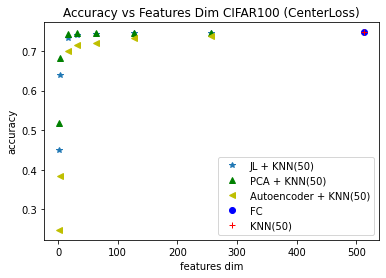

In [45]:
plt.plot([256,128,64,32,16,4,2],res,'*',label=f"JL + KNN({n_neighbors})")
plt.plot([256,128,64,32,16,4,2],res_pca,'g^',label=f"PCA + KNN({n_neighbors})")
plt.plot([256,128,64,32,16,4,2],res_autoencoder,'y<',label=f"Autoencoder + KNN({n_neighbors})")
plt.plot([512,],fc_results,'bo',label="FC")
plt.plot([512,],[knn_512,],'r+',label=f"KNN({n_neighbors})")
plt.title("Accuracy vs Features Dim CIFAR100 (CenterLoss)")
plt.xlabel("features dim")
plt.ylabel("accuracy")
plt.legend()
plt.show()

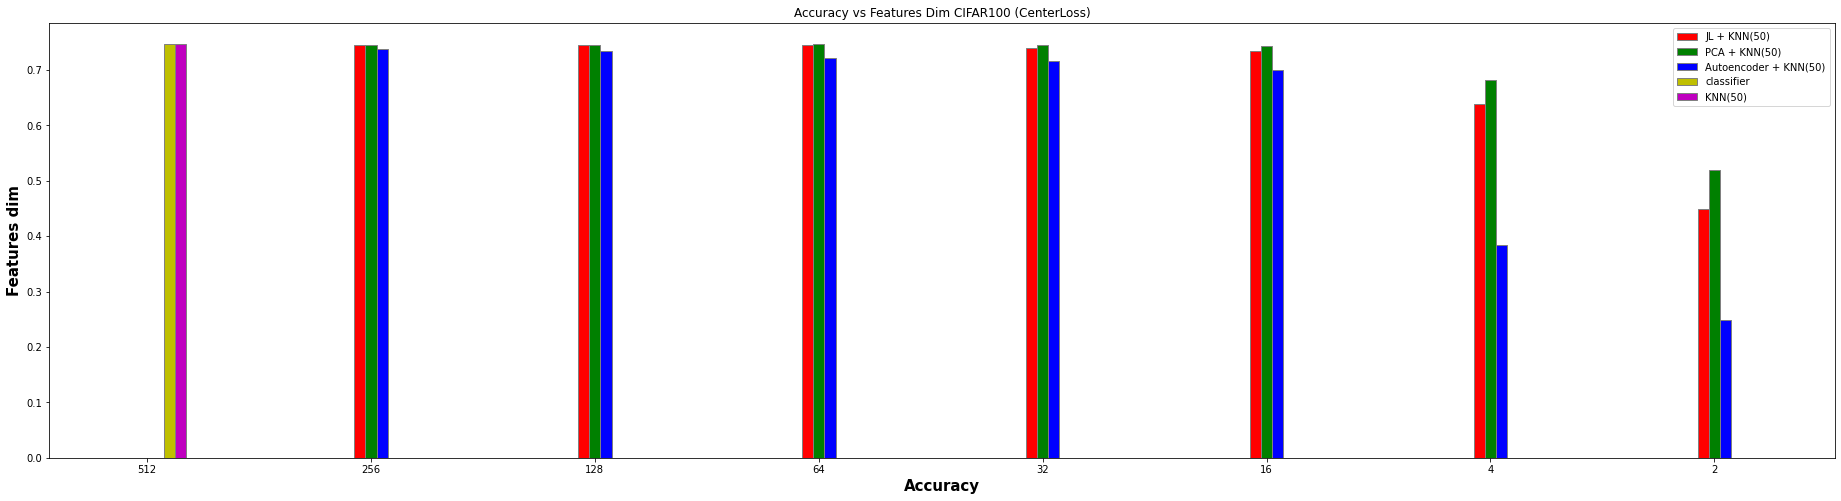

In [46]:
# set width of bar
barWidth = 0.05
fig = plt.subplots(figsize =(32, 8))

 
# Set position of bar on X axis
br1 = np.arange(len(res)+1)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, [0,]+res, color ='r', width = barWidth,
        edgecolor ='grey', label=f"JL + KNN({n_neighbors})")
plt.bar(br2, [0,]+res_pca, color ='g', width = barWidth,
        edgecolor ='grey', label =f"PCA + KNN({n_neighbors})")
plt.bar(br3, [0,]+res_autoencoder, color ='b', width = barWidth,
        edgecolor ='grey', label =f"Autoencoder + KNN({n_neighbors})")
plt.bar(br4, [fc_results.tolist(),]+[0,]*len(res), color ='y', width = barWidth,
        edgecolor ='grey', label =f"classifier")
plt.bar(br5, [knn_512,]+[0,]*len(res), color ='m', width = barWidth,
        edgecolor ='grey', label =f"KNN({n_neighbors})")
 
# Adding Xticks
plt.title("Accuracy vs Features Dim CIFAR100 (CenterLoss)")
plt.xlabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.ylabel('Features dim', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len([512,256,128,64,32,16,4,2]))],
        [512,256,128,64,32,16,4,2])
 
plt.legend()
plt.show()

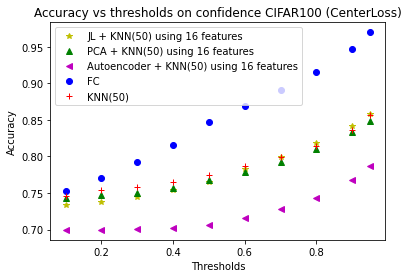

In [47]:
plt.plot(trs,res_tr_dict[16].values(),'y*',label=f"JL + KNN({n_neighbors}) using 16 features ")
plt.plot(trs,res_tr_dict_pca[16].values(),'g^',label=f"PCA + KNN({n_neighbors}) using 16 features")
plt.plot(trs,res_tr_dict_autoencoder[16].values(),'m<',label=f"Autoencoder + KNN({n_neighbors}) using 16 features")
plt.plot(trs,list(cls_results.values()),'bo',label="FC")
plt.plot(trs,list(res_tr_dict_full.values()),'r+',label=f"KNN({n_neighbors})")
plt.title("Accuracy vs thresholds on confidence CIFAR100 (CenterLoss)")
plt.xlabel("Thresholds")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

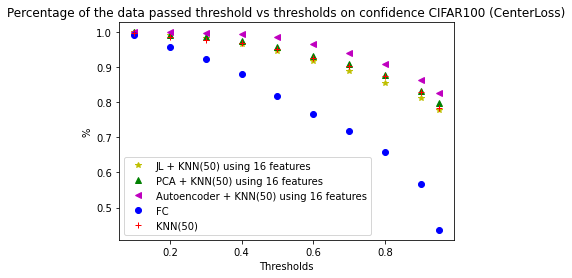

In [48]:
plt.plot(trs,num_of_passed_dict[16].values(),'y*',label=f"JL + KNN({n_neighbors}) using 16 features ")
plt.plot(trs,num_of_passed_dict_pca[16].values(),'g^',label=f"PCA + KNN({n_neighbors}) using 16 features")
plt.plot(trs,num_of_passed_dict_autoencoder[16].values(),'m<',label=f"Autoencoder + KNN({n_neighbors}) using 16 features")
plt.plot(trs,cls_per.values(),'bo',label="FC")
plt.plot(trs,num_of_passed_dict_full.values(),'r+',label=f"KNN({n_neighbors})")
plt.title("Percentage of the data passed threshold vs thresholds on confidence CIFAR100 (CenterLoss)")
plt.xlabel("Thresholds")
plt.ylabel("%")
plt.legend()
plt.show()